
# Investigate a Dataset (Medical Appointment No Shows) 
#### Shahad Alshayiqi


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I analyzed a Medical Appointment No Shows dataset and published my findings on this topic using the Python NumPy, pandas, Matplotlib and seaborn libraries. This dataset collects information from 100,000 medical appointments in Brazil and focuses on the question of whether or not patients will show up for their appointments.


## Questions : 
1- Is there any relation between Gender and No Show?

2- Is there any relation between Age and No Show?

3- Is there any relation between appoinment day and No show?




In [292]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [293]:
# Load data in the panda data frame
data = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
# show 5 first rows 
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


     The AppointmentDay contains the time part, which must contain actual time not (00:00:00)


In [294]:
# dataset general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [295]:
#number of rows and coulmns
data.shape

(110527, 14)

    110,527 rows and 14 columns.

In [296]:
# columns data types
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [297]:
# check if their are missing values ! but guess what ?? woohooo our dataset doe not hava missing values

data.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [298]:
# check if their ara duplicated rows
data.duplicated().sum()

0

    the dataset does not have missing or duplicated values/rows.

In [299]:
# show unique values"
data.nunique()


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

    1- 62,299 unique PatientId , which means some patient in this dataset schedule more than one appoiment
    2- 27 unique AppointmentDay 
    3- 81 unique neighbourhoods , we don't need this information now , but it may be usfuall in future .

In [300]:
# calculate the dataset coverage period 

data['AppointmentDay'].min() , data['AppointmentDay'].max()


('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

    the result shows the dataset covers only 40 days . 

In [301]:
# check the age values 
data.Age.value_counts()


 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

         we have  one '-1' value , we should deal with this by drop this row .
         

In [302]:
# check the agender values 
data.Gender.value_counts()


F    71840
M    38687
Name: Gender, dtype: int64

        we have 71840 female and 38687 male, in this dataset .
        




### Data Cleaning 

In [303]:
# drop unused columns 
data.drop(['Neighbourhood' ,'Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received'], axis=1, inplace=True)
data.shape


(110527, 7)

In [304]:
# drop '-1' value from age 
data.drop(data.query('Age == -1').index,inplace=True)
# check 
data.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,No-show


In [305]:
#change the datatypes of AppoetmintDay and scheduledDay  to datetime

columns = [ 'AppointmentDay' , 'ScheduledDay']
for x in columns:
    data[x] = pd.to_datetime(pd.to_datetime(data[x]).dt.date)
#check
print(data.dtypes)
data.head()

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
No-show                   object
dtype: object


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,No


<a id='eda'></a>
## Exploratory Data Analysis




In [306]:
# making masks to use in Analysis
miss = data["No-show"] == "Yes"
show = data["No-show"] == "No"

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>],
       [<AxesSubplot:title={'center':'ScheduledDay'}>,
        <AxesSubplot:title={'center':'AppointmentDay'}>],
       [<AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

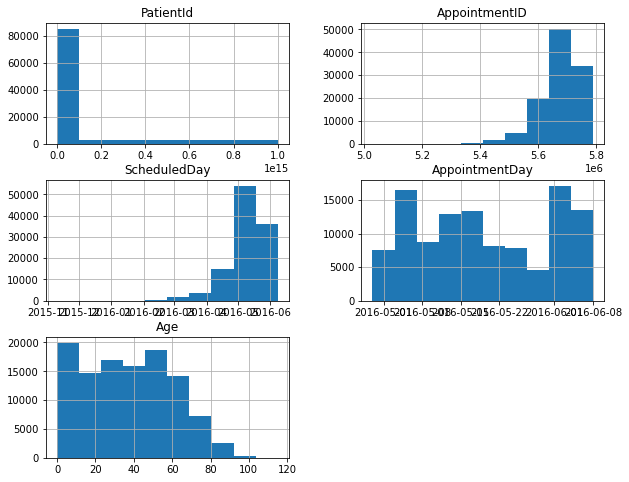

In [307]:
# overview of the data set
data.hist(figsize=(10,8))

<a id='eda'></a>
#### gender column


In [308]:
# calucluate the average of gender counts for F and M 
print(round(data.Gender.value_counts()/len(data)*100))


F    65.0
M    35.0
Name: Gender, dtype: float64


        65 % are Females , and 35 % are males.

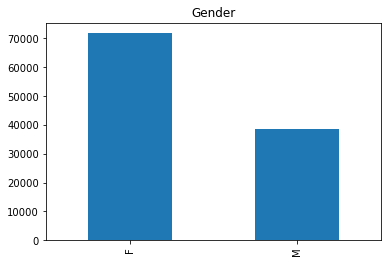

In [309]:
# plot a bar chart
data.Gender.value_counts().plot(kind="bar")
plt.title("Gender");

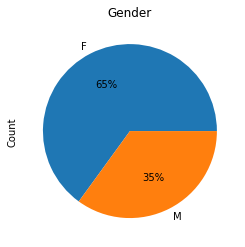

In [310]:
# plot a pie chart
data["Gender"].value_counts().plot(kind="pie",autopct='%1.f%%')
plt.ylabel("Count")
plt.title("Gender");

        Most patients were Females.

### Is there any relation between Gender and No Show? ### 

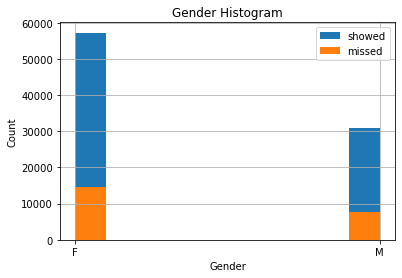

In [311]:
# number of Gender in miss and show status

data[show].Gender.hist(label="showed")
data[miss].Gender.hist(label="missed")
plt.legend();
plt.title("Gender Histogram")
plt.xlabel("Gender")
plt.ylabel("Count");

In [312]:
# calculate the percentage of missed status for each Gender

Gender_miss = data[miss].groupby('Gender').count().PatientId
print(" \n number of miss status in Gender : " ,Gender_miss)

Gender_total = data.groupby('Gender').count().PatientId
print("\n  total number of days: " ,Gender_total)

Gender_percentage = (Gender_miss / Gender_total) *100
print(" \n percentage of missed status in Gender: " ,Gender_percentage)


 
 number of miss status in Gender :  Gender
F    14594
M     7725
Name: PatientId, dtype: int64

  total number of days:  Gender
F    71839
M    38687
Name: PatientId, dtype: int64
 
 percentage of missed status in Gender:  Gender
F    20.314871
M    19.967948
Name: PatientId, dtype: float64


Text(0.5, 0, 'Gender')

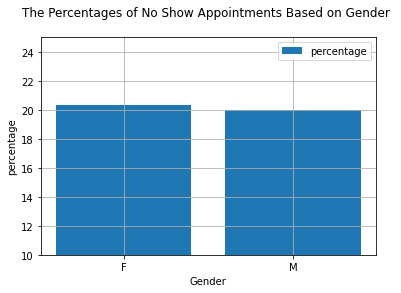

In [313]:
#create a chart to present the percentage

figure_Gender, gender_chart =plt.subplots()
gender_chart.bar(Gender_percentage.index,Gender_percentage.values,label='percentage')
gender_chart.set_ylim(10 , 25)
gender_chart.set_title('The Percentages of No Show Appointments Based on Gender \n ')
gender_chart.set_ylabel('percentage')
gender_chart.grid()
gender_chart.legend()
gender_chart.set_xlabel('Gender')


        The percentage of Males and Females in Missed status are very close , 
        so we can not deside or say : Thier are a relationship between the Gender and the No-Show Appoinments .


#### Age column 

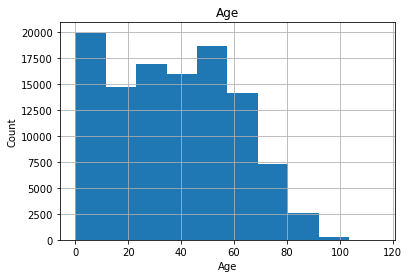

In [314]:
# plot a bar chart

data.Age.hist()
plt.xlabel("Age") 
plt.ylabel("Count")
plt.title("Age");

In [315]:
#counts
Age_count = data.Age.value_counts()
print(Age_count)

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64


### Is there any relation between Age and No Show?

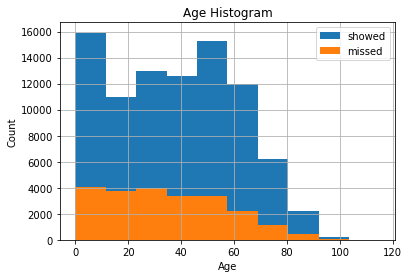

In [316]:
# this chart will show the count of missed and showed status 
data[show].Age.hist(label="showed")
data[miss].Age.hist(label="missed")
plt.legend();
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Count");

In [317]:
# Age_noshow = data.groupby("Age")["No-show"].value_counts()
# print(Age_noshow)

In [318]:
# round(Age_noshow / Age_noshow.groupby(level=0).sum() * 100,2).unstack().plot(kind="bar", figsize=(25,5));
# plt.legend(["showed","missed"]);
# plt.title("Persantage of Age with no show");

In [319]:
# calculate the percentage of missed status in Age

Age_miss = data[miss].groupby('Age').count().PatientId
print("\n Number of miss status in each Age : " ,Age_miss)

Age_total = data.groupby('Age').count().PatientId
print("\n total number of Age: " ,Age_total)

Age_percentage = (Age_miss / Age_total) *100
print("\n percentage of missed status in each Age: " ,Age_percentage)



 Number of miss status in each Age :  Age
0      639
1      415
2      252
3      277
4      282
      ... 
95       6
96       1
97       2
98       1
115      3
Name: PatientId, Length: 100, dtype: int64

 total number of Age:  Age
0      3539
1      2273
2      1618
3      1513
4      1299
       ... 
98        6
99        1
100       4
102       2
115       5
Name: PatientId, Length: 103, dtype: int64

 percentage of missed status in each Age:  Age
0      18.055948
1      18.257809
2      15.574784
3      18.307997
4      21.709007
         ...    
98     16.666667
99           NaN
100          NaN
102          NaN
115    60.000000
Name: PatientId, Length: 103, dtype: float64


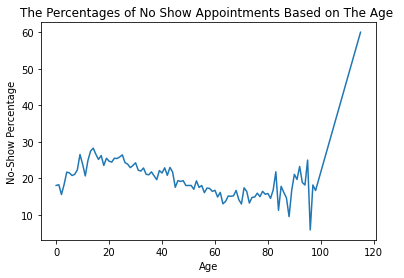

In [320]:
# create figure 
sns.lineplot(x = Age_percentage.index,  y = Age_percentage)
plt.title('The Percentages of No Show Appointments Based on The Age ')
plt.xlabel('Age')
plt.ylabel('No-Show Percentage');

                the patients from 20 to 60 are more likely to miss their appointments.

#### AppointmentDay column  : 
##### Add a Day column .

In [321]:
# find the AppointmentDay 
day = data.AppointmentDay.dt.weekday 
# insert a new column (day) 
data.insert(5, 'day', day)
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,day,Age,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,4,62,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,4,56,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,4,62,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,4,8,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,4,56,No


In [322]:
day_counts = data.day.value_counts()
print(day_counts)

2    25867
1    25640
0    22714
4    19019
3    17247
5       39
Name: day, dtype: int64


In [323]:
# create a day labels to use in charts
days_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

### 3- Is there any relation between AppointmentDay and No show?


In [324]:
day_noshow = data.groupby("day")["No-show"].value_counts()
print(day_noshow)

day  No-show
0    No         18024
     Yes         4690
1    No         20488
     Yes         5152
2    No         20774
     Yes         5093
3    No         13909
     Yes         3338
4    No         14982
     Yes         4037
5    No            30
     Yes            9
Name: No-show, dtype: int64


In [325]:
data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,day,Age,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,4,62,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,4,56,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,4,62,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,4,8,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,4,56,No


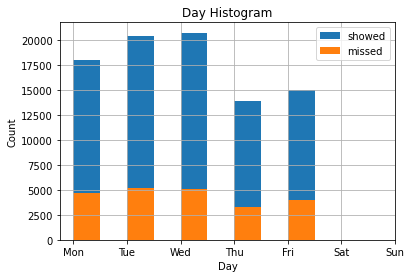

In [326]:
data[show].day.hist(label="showed")
data[miss].day.hist(label="missed")
plt.legend();
plt.title("Day Histogram")
plt.xticks(np.arange(0, 6+1, 1), weekday_labels)
plt.xlabel("Day")
plt.ylabel("Count");

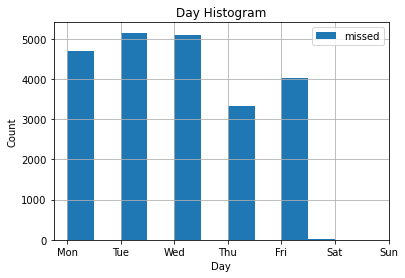

In [327]:
data[miss].day.hist(label="missed")
plt.legend();
plt.title("Day Histogram")
plt.xticks(np.arange(0, 6+1, 1), weekday_labels)
plt.xlabel("Day")
plt.ylabel("Count");

         This chart shows counts of missed appointment in each day

In [328]:
# calculate the percentage of missed status

days_miss = data[miss].groupby('day').count().PatientId
print("number of miss status in each day : " ,days_miss)

days_total = data.groupby('day').count().PatientId
print("total number of days: " ,days_total)

days_percentage = (days_miss / days_total) *100
print("percentage of missed status in each day: " ,days_percentage)


number of miss status in each day :  day
0    4690
1    5152
2    5093
3    3338
4    4037
5       9
Name: PatientId, dtype: int64
total number of days:  day
0    22714
1    25640
2    25867
3    17247
4    19019
5       39
Name: PatientId, dtype: int64
percentage of missed status in each day:  day
0    20.648058
1    20.093604
2    19.689179
3    19.354091
4    21.226142
5    23.076923
Name: PatientId, dtype: float64


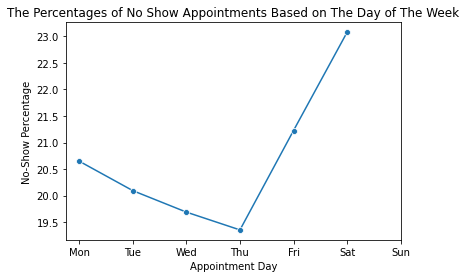

In [329]:
# create figure 
sns.lineplot(x = days_percentage.index,  y = days_percentage, marker='o')
plt.title('The Percentages of No Show Appointments Based on The Day of The Week')
plt.xticks(np.arange(0, 6+1, 1), weekday_labels)
plt.xlabel('Appointment Day')
plt.ylabel('No-Show Percentage');

        The Above figure shows that the percentage of No Show Appointment increase in the weekend . 
        and pepole prefer to come to thier appoinments in the week days specialy in Monday and Thursday .

<a id='conclusions'></a>
## Conclusions

After analysing the whole data.

I highly recommend that the main reason of no-show cases is that people didn't get an appiontment in the same date of booking. people may lose their urge, forget the date or even become busy with another unpredicted events. as we get a ratio of no-show =0.04 . For 34277 cases. when they booked an appiontment in the same day.


In this project, I analyzed a Medical Appointment No Shows dataset and published my findings on this topic using the Python NumPy, pandas, Matplotlib and seaborn libraries. This dataset collects information from 100,000 medical appointments in Brazil in only 40 days.


Most patients:

-females.
-young.
-prefer the weekdays for thier appointment.


limitations :
- The dataset coverage a small period.
- I suggest the Distance from the hospital to the neighbourhood to be provided, I think it's will be usefull.

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!